### Import Libraries and Load the Data

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats 

In [7]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Do smokers have higher insurance charges than non-smokers?

#### Null Hypothesis: 
The insurance charges are the same between smokers and non-smokers.

#### Alternative Hypothesis:
There is a significant difference in insurance charges based on whether or not a person smokes.

#### Test Selection:
2 Sample T-Test

Data Type: Numeric

Number of Samples: 2 (Smoker, Nonsmoker)


In [12]:
# Get neccessary columns
data = df[['smoker','charges']]
data.head()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


In [13]:
# Check for value counts
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
# Create the necessary filters
smoker_filter = data['smoker'] == 'yes'
nonsmoker_filter = data['smoker'] == 'no'

In [20]:
# Filtered dataframes 
smoker_df = data[smoker_filter]
nonsmoker_df = data[nonsmoker_filter]


#### Visualization

In [21]:
# Merge both dataframes
plot_df = pd.concat([smoker_df, nonsmoker_df])
plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


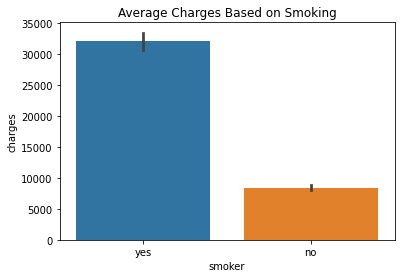

In [27]:
# Plot a graph
ax= sns.barplot(data= plot_df, x= 'smoker', y= 'charges');
ax.set_title('Average Charges Based on Smoking');

#### Testing Assumptions

In [28]:
# Check for Outliers for Smokers
smoker_group = smoker_df['charges']
smoker_outlier = np.abs(stats.zscore(smoker_group))>3
# Check for Outliers for Nonsmokers
nonsmoker_group = nonsmoker_df['charges']
nonsmoker_outlier = np.abs(stats.zscore(nonsmoker_group))>3


False    1040
True       24
Name: charges, dtype: int64

In [30]:
# Check Outliers for Smokers
smoker_outlier.value_counts()

False    274
Name: charges, dtype: int64

In [31]:
# Check Outliers for Nonsmokers
nonsmoker_outlier.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [35]:
# Remove the outlier
nonsmoker_group = nonsmoker_group[~nonsmoker_outlier]

nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Test for Normality

In [63]:
# Check for normality in smoker group
smoker_result = stats.normaltest(smoker_group)
smoker_result.pvalue < 0.05

True

In [64]:
# Check for normality in nonsmoker group
nonsmoker_result = stats.normaltest(nonsmoker_group)
nonsmoker_result.pvalue < 0.05

True

#### Test for Equal Variance

In [65]:
# Use the Levene's test for equal variance

result= stats.levene(smoker_group, nonsmoker_group)

# Interpret the results
if result.pvalue < 0.5:
    print('The group DO NOT have equal variance')
else:
     print('The group DO have equal variance')

The group DO NOT have equal variance


#### Final Hypothesis test

##### Did we meet the assumptions?
Assumptions were not met.
we will use an alernative test with equal_var= false to ttest_ind

In [66]:
# Run final hypothesis test

result = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var= False)
result.pvalue < 0.05

True

In [48]:
# Check Means of both groups
print('Average charge for smoker:', smoker_group.mean())
print('Average charge for nonsmoker:', nonsmoker_group.mean())

Average charge for smoker: 32050.23183153284
Average charge for nonsmoker: 7939.8608446721155


##### Final Conclusion:
The pvalue for the test is less than alpha, therefore we reject the null hypothesis and support the alternate hypothesis. This indicates that there is a significant difference in insurance charges among smokers and non smokers. 

### Are men more likely to smoke than women?

#### Null Hypothesis: 
Men and Women have the same likelyhood to smoking.

#### Alternative Hypothesis:
There is a significant difference between the two genders and smoking.

#### Test Selection:
Chi-Square

Data Type: Categorical

Number of Samples: 2

In [53]:
# Get neccessary columns
data = df[['smoker','sex']]
data.head()

,smoker,sex
0,yes,female
1,no,male
2,no,male
3,no,male
4,no,male


In [50]:
# Check for value counts
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [57]:
# Check for value counts
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

#### Visualization

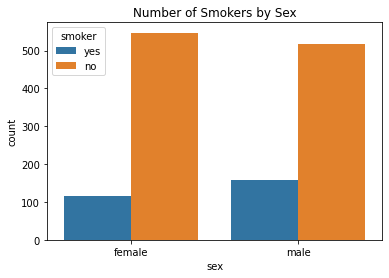

In [56]:
# Plot a graph
ax = sns.countplot(data= data, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

#### Contingency Table for Chi Squared Test

In [61]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(data['sex'], data['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


#### Final Hypothesis test

In [67]:
# Run the Test and Save the Output

result = stats.chi2_contingency(table)

#this labels the results
chi2, p, deg_free, expected_vals = result

# Check the p-value
print(p)
p<.05

0.006548143503580696


True

##### Final Conclusion:
The pvalue for the test is less than alpha, therefore we reject the null hypothesis and support the alternate hypothesis. This indicates that there is a significant difference between the two genders and smoking.

### Do different regions have different charges, on average?

#### Null Hypothesis: 
Different regions have the similar charges on average.

#### Alternative Hypothesis:
There is a significant difference in charges on average, among different regions.

#### Test Selection:
Anova

Data Type: Numerical

Number of Samples:  More than 2

In [68]:
# Get neccessary columns
data = df[['region','charges']]
data.head()

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520


In [69]:
# Check for value counts
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### Visualization

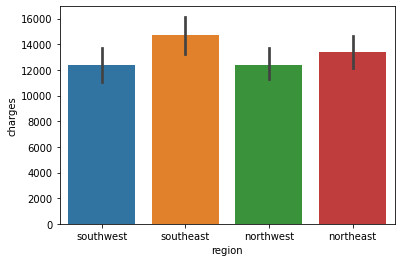

In [70]:
# Plot barchart

sns.barplot(data=data, x='region',y='charges');

#### Testing Assumptions

In [71]:
## Create groups dictionary. 

groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### Test for Normality

In [73]:
# Running normal test on each group and confirming there are >20 in each group
norm_results = {}

for i, data in groups.items():
    stat, p = stats.normaltest(data)
    
    # save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
    
# convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [74]:
# checking sig with pandas 

norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


#### Test for Equal Variance

In [75]:
# with the * operator 

stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

#### Final Hypothesis test

##### Did we meet the assumptions?
Assumptions were not met.

In [76]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience

result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

##### Final Conclusion:
The pvalue for the test is less than alpha, therefore we reject the null hypothesis and support the alternate hypothesis. This indicates that there is a significant difference in insurance charges among different regions.